# Rotating edge experiment

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import lineart.transforms as transforms
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
import lineart.style as style

In [7]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [10]:
transforms.rotate_xy(edges, 0, np.pi/2)

array([[[ 0.,  0.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.]]])

## split edges

In [11]:
def draw_edges(edges, image_size=100, v=False):
    
    edges = edges.reshape(-1,2,3)[:,:,:-1]
    # page setup
    d = document(image_size, image_size, 'mm')
    page = d.addpage()
    page.place(style.background.rectangle(0,0,image_size,image_size))
    for e in edges:
        page.place(style.edge.line(*e.flatten()))
    if v:
        for p in edges.reshape(-1,2):
            page.place(style.debug.circle(*p, 2))
        
    return (page.image(kind='rgba', ppi=60).png())

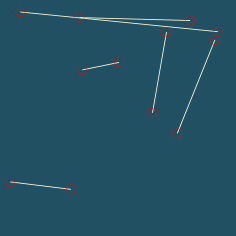

In [12]:
edges = np.random.rand(6,2,3)*100
Image(draw_edges(edges, v=True))

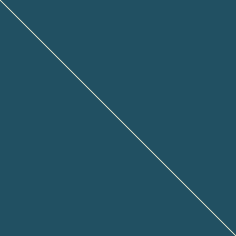

In [13]:
Image(draw_edges(e*100))

In [14]:
def split(e, n):
    fracs = np.random.rand(n, 1)
    fracs.sort(axis=0)
    vector = e[1] - e[0]
    splits = np.multiply(fracs[::-1], vector) + e[0]
    points = np.concatenate((e[1].reshape(1,3),splits,e[0].reshape(1,3)))
    starts = points[:-1]
    ends = points[1:]
    edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)
    return edges

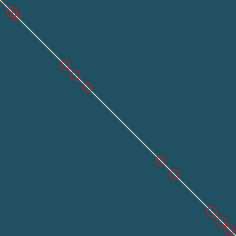

In [27]:
splits = split(e*100,10)

Image(draw_edges(splits, v=True))

In [153]:
class EdgeCollection:
    def __init__(self, edges, velocities):
        self.edges = edges
        self.velocities = velocities
        self.centers = self.edges.sum(axis=1)/2
    def move(self, t):
        self.edges = self.edges + t*np.repeat(self.velocities[:,np.newaxis, :], 2, axis=1)
    def rotate_indiv(self, theta, normal=[0,0,1]):
        rot_mat = transforms.rotation_matrix(theta, [0,0,1])
        edge_p0 = np.repeat(self.centers[:,np.newaxis, :], 2, axis=1)
        self.edges = (np.matmul((split_collection.edges - edge_p0), rot_mat) + edge_p0)

In [154]:
split_collection = EdgeCollection(splits, np.random.randn(*splits[:,0,:].shape))

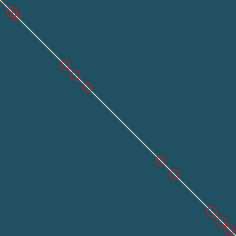

In [155]:
Image(draw_edges(split_collection.edges, v=True))

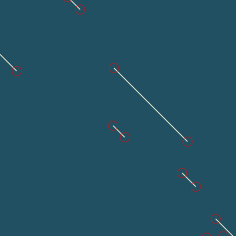

In [172]:
split_collection.move(1)
# split_collection.rotate_indiv(np.pi/50)
Image(draw_edges(split_collection.edges, v=True))

In [81]:
edges

array([[[75.04405398, 56.46648329, 20.31897183],
        [90.99079122, 16.86885395, 85.62738788]],

       [[ 4.35357729, 77.00121778, 81.03324065],
        [30.0278506 , 80.15796384,  5.81202874]],

       [[64.55983154, 47.75144402, 26.63299122],
        [70.49289172, 13.54178247, 23.12788994]],

       [[50.37419433, 26.42070258, 19.62413544],
        [34.84341643, 29.59515212, 73.75110017]],

       [[80.44183616,  8.6898059 , 84.39425673],
        [33.65252055,  7.45024473, 19.1950754 ]],

       [[92.26312278, 13.42543504, 25.76594204],
        [ 8.61269092,  5.07687582,  9.91251548]]])

In [21]:
edges.sum(axis=1)/2

array([[83.0174226 , 36.66766862, 52.97317986],
       [17.19071395, 78.57959081, 43.4226347 ],
       [67.52636163, 30.64661324, 24.88044058],
       [42.60880538, 28.00792735, 46.6876178 ],
       [57.04717836,  8.07002532, 51.79466607],
       [50.43790685,  9.25115543, 17.83922876]])

In [22]:
rotate_xy(edges, edges.sum(axis=1)/2, np.pi)

NameError: name 'rotate_xy' is not defined

In [44]:
rot_mat = transforms.rotation_matrix([0,0,0], [0,0,1], np.pi/2)

In [45]:
rot_mat.shape


(3, 3)

In [46]:
edge_rot_mat = np.repeat(rot_mat[np.newaxis,:, :], 2, axis=0)

In [47]:
edge_rot_mat.shape

(2, 3, 3)

In [48]:
edge_p0 = np.repeat(split_collection.centers[:,np.newaxis, :], 2, axis=1)

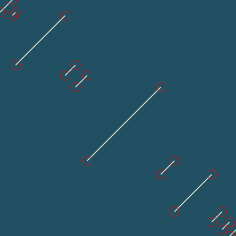

In [67]:
Image(draw_edges((np.matmul((split_collection.edges - edge_p0), rot_mat) + edge_p0), v=True))

In [56]:
split_collection.edges.shape

(11, 2, 3)

In [52]:
edge_p0

array([[[98.59031238, 98.59031238,  0.        ],
        [98.59031238, 98.59031238,  0.        ]],

       [[95.57811547, 95.57811547,  0.        ],
        [95.57811547, 95.57811547,  0.        ]],

       [[91.80040519, 91.80040519,  0.        ],
        [91.80040519, 91.80040519,  0.        ]],

       [[81.73588968, 81.73588968,  0.        ],
        [81.73588968, 81.73588968,  0.        ]],

       [[70.9535059 , 70.9535059 ,  0.        ],
        [70.9535059 , 70.9535059 ,  0.        ]],

       [[52.47371156, 52.47371156,  0.        ],
        [52.47371156, 52.47371156,  0.        ]],

       [[34.42242876, 34.42242876,  0.        ],
        [34.42242876, 34.42242876,  0.        ]],

       [[29.75500316, 29.75500316,  0.        ],
        [29.75500316, 29.75500316,  0.        ]],

       [[17.08186315, 17.08186315,  0.        ],
        [17.08186315, 17.08186315,  0.        ]],

       [[ 5.90367022,  5.90367022,  0.        ],
        [ 5.90367022,  5.90367022,  0.        ]],



In [53]:
edge_rot_mat

array([[[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
        [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]],

       [[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
        [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]]])

In [64]:
np.matmul(np.ones((11,2,3)), np.ones((3,3))).shape

(11, 2, 3)